In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jsonlines
from collections import defaultdict
import json
from pathlib import Path
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.image as mpimg
from tqdm.notebook import tqdm
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.image as mpimg
print(f"available fonts: {sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])}")

plt.style.use('seaborn-muted')

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.format"] = "pdf"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.1

plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 18

plt.rcParams["lines.linewidth"] = 2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 6

plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['lines.marker'] = ""
plt.rcParams['legend.frameon'] = False

available fonts: ['Arial', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'Helvetica', 'Helvetica', 'Helvetica', 'Helvetica', 'Helvetica Compressed', 'Helvetica Light', 'Helvetica Rounded', 'Palatino Linotype', 'Palatino Linotype', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'Times New Roman', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [4]:
def list2count(_list):
    count = defaultdict(int)
    for x in _list:
        count[x] += 1
    count = {key: val for key, val in sorted(count.items())}
    return count

def show_statistics(data):
    print(f"Total samples: {len(data)}")
    
    source_count = defaultdict(int)
    for sample in data:
        source_count[sample["ori"]] += 1
    print(f"Source count: {json.dumps(source_count, indent=2)}")
    
    steps = []
    durations = []
    clip_durations = []
    for sample in data:
        n_step = len(sample["annotation"])
        steps.append(n_step)
        durations.append(sample["duration"])
        clip_duration = sum([x['segment'][1] - x['segment'][0] for x in sample["annotation"]])
        clip_durations.append(clip_duration)
    steps_count = list2count(steps)
    # print(f"Steps count: {json.dumps(steps_count, indent=2)}")
    print(f"Total steps: {sum(steps)}, total states: {sum(steps) + len(steps)}")
    
    cross_steps_count = list2count([steps[i] for i, sample in enumerate(data) if sample["ori"] == "cross"])
    # var_steps_count = list2count([steps[i] for i, sample in enumerate(data) if sample["ori"] == "var"])
    coin_steps_count = list2count([steps[i] for i, sample in enumerate(data) if sample["ori"] == "coin"])

    
    # ax1.plot(range(len(steps)), steps, linewidth=1)
    # ax1.set_title("Step Overview",  fontstyle='italic')
    # ax1.set_xlabel("samples")
    # ax1.set_ylabel("steps")
    
    def plot_step_count(ax):
        ax.plot(steps_count.keys(), steps_count.values(), "-", label="total")
        ax.plot(cross_steps_count.keys(), cross_steps_count.values(), "--", label="cross")
        # ax2.plot(var_steps_count.keys(), var_steps_count.values(), ":", label="var")
        ax.plot(coin_steps_count.keys(), coin_steps_count.values(), "-.", label="coin")

        ax.set_title("Step Count", fontstyle="italic")
        ax.set_xlabel("steps")
        ax.set_ylabel("number of samples")
        ax.legend(loc='best', numpoints=1, fancybox=False)
        
    def plot_step_dist(ax):
        # bins = np.arange(14) - 0.5
        index = np.arange(len(steps_count.keys()))
        ax.bar(index, steps_count.values(), 0.9)
        # ax.hist(steps)
        ax.set_xticks(index, steps_count.keys())

        ax.set_title("Step Distribution", fontstyle="italic")
        ax.set_xlabel("steps")
        ax.set_ylabel("number of samples")


    def plot_duration_dist(ax):
        ax.hist(clip_durations, bins=100)

        ax.set_title("Duration Distribution", fontstyle="italic")
        ax.set_xlabel("duration")
        ax.set_ylabel("number of samples")
    
        
    width, height = plt.figaspect(0.3)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(width, height))
    # plot_step_count(ax1)
    plot_step_dist(ax1)
    plot_duration_dist(ax2)
    
    # plt.subplots_adjust(hspace=0.25, wspace=0.40)
    plt.subplots_adjust(top=0.8, hspace=None, wspace=None) 

    fig.suptitle("Statistics of VTT dataset")

Total samples: 13547
Source count: {
  "cross": 1825,
  "coin": 11722
}
Total steps: 55482, total states: 69029


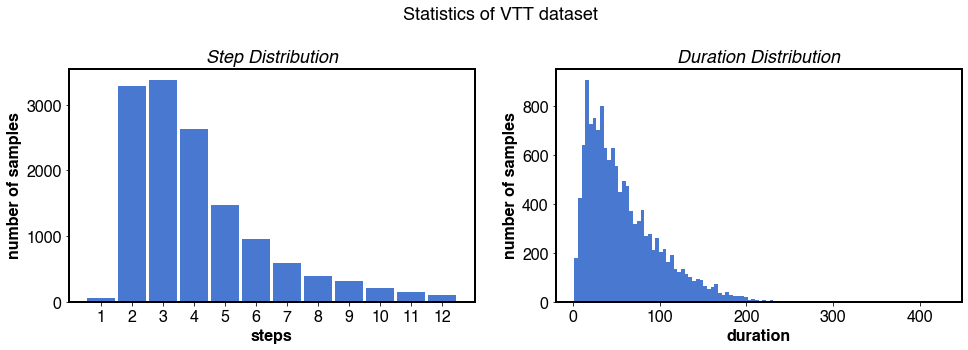

In [5]:
with jsonlines.open("/data/vtt/meta/vtt.jsonl") as reader:
    data = list(reader)
show_statistics(data)
plt.savefig("statistics-all.pdf")

In [6]:
with jsonlines.open("/data/vtt/meta/vtt.jsonl") as reader:
    data = list(reader)
steps = []
durations = []
clip_durations = []
for sample in data:
    n_step = len(sample["annotation"])
    steps.append(n_step)
    durations.append(sample["duration"])
    clip_duration = sum([x['segment'][1] - x['segment'][0] for x in sample["annotation"]])
    clip_durations.append(clip_duration)
steps_count = list2count(steps)

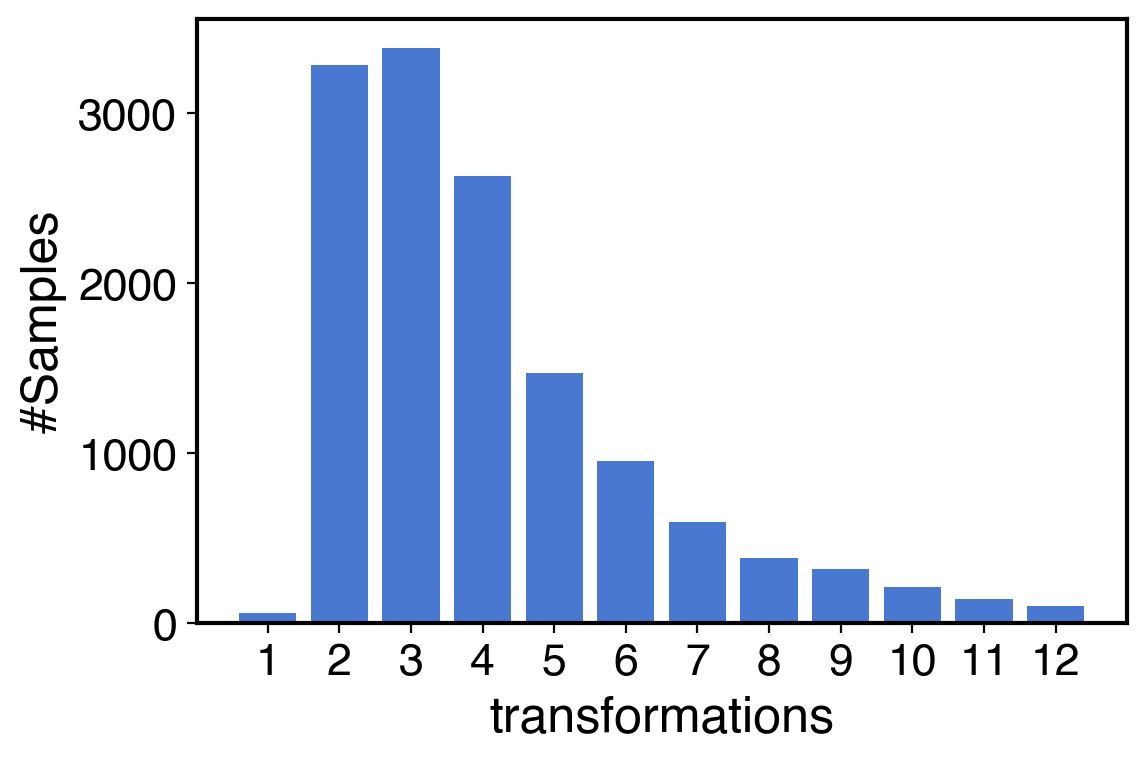

In [7]:
font_size = 16
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1.5

plt.bar(steps_count.keys(), steps_count.values())
plt.xticks(list(steps_count.keys()))
plt.xlabel("transformations")
plt.ylabel("#Samples")

plt.savefig("steps_dist.pdf", dpi=300)

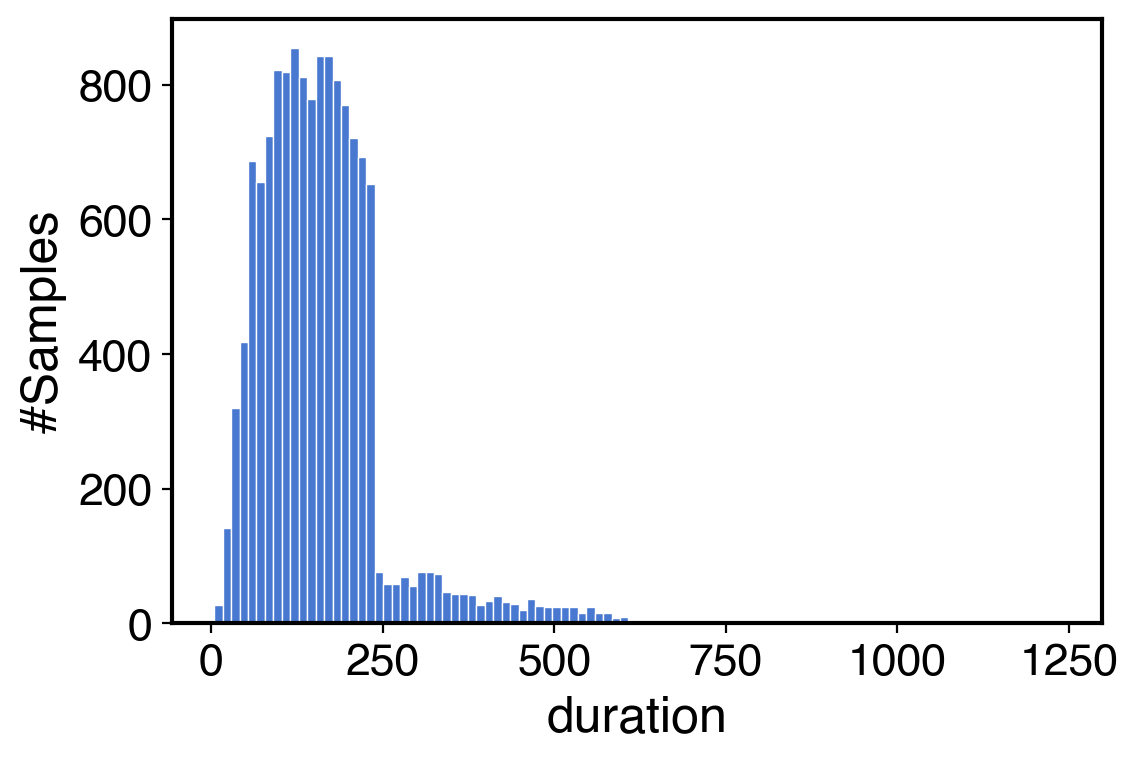

In [8]:
# import scipy.stats
font_size = 16
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1.5

_, bins, _ = plt.hist(durations, bins=100, density=False, edgecolor='w', linewidth=0.5)

# mu, sigma = scipy.stats.norm.fit(durations)
# best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
# plt.plot(bins, best_fit_line, 'k--', alpha=0.5)

plt.xlabel("duration")
plt.ylabel("#Samples")

plt.savefig("duration_dist.pdf", dpi=300)

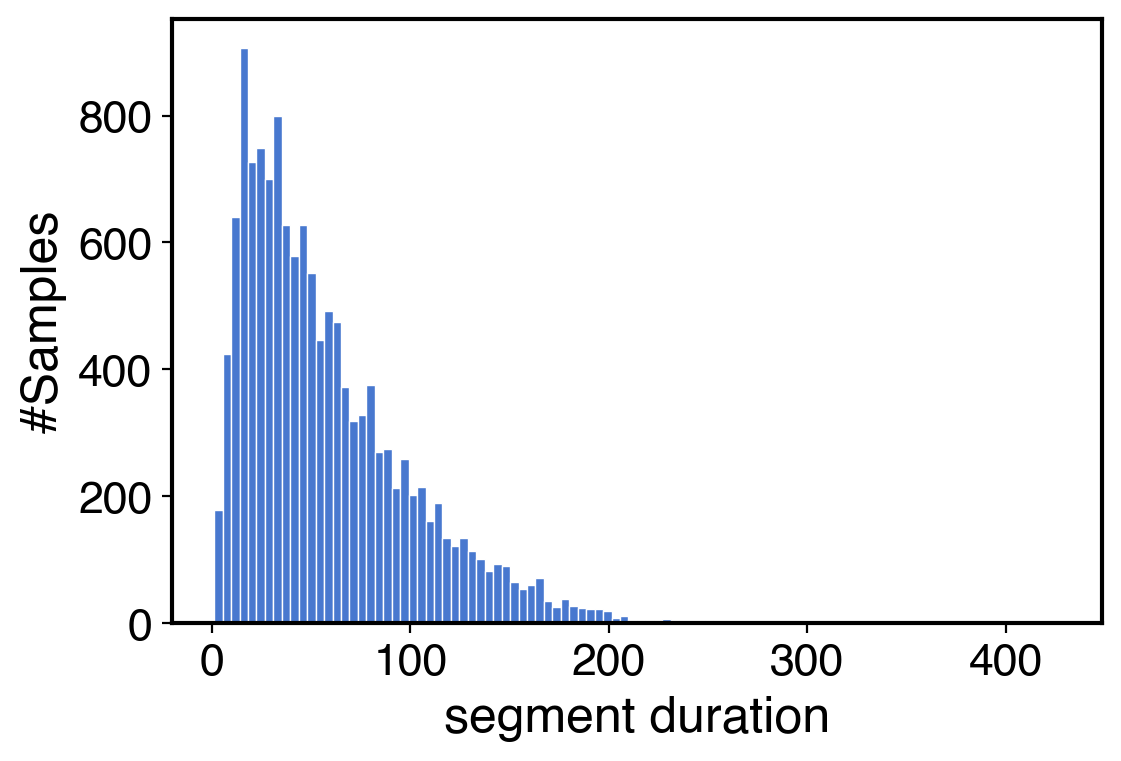

In [9]:
# import scipy.stats
font_size = 16
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1.5

_, bins, _ = plt.hist(clip_durations, bins=100, density=False, edgecolor='w', linewidth=0.5)

# mu, sigma = scipy.stats.norm.fit(durations)
# best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
# plt.plot(bins, best_fit_line, 'k--', alpha=0.5)

plt.xlabel("segment duration")
plt.ylabel("#Samples")

plt.savefig("segment_duration_dist.pdf", dpi=300)

## sentence statistics

In [10]:
import spacy

# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")

sentences = defaultdict(list)
words = defaultdict(lambda: defaultdict(int))
words_all = []
for sample in tqdm(data):
    for step in sample["annotation"]:
        sentences[sample["ori"]].append(len(step['label'].split()))
        doc = nlp(step['label'])
        for word in doc:
            word = str(word)
            words_all.append(word)
            if word not in [",", "."]:
                words[sample["ori"]][word] += 1
sentences_count = {}
for key, val in sentences.items():
    sentences_count[key] = list2count(val)

  0%|          | 0/13547 [00:00<?, ?it/s]

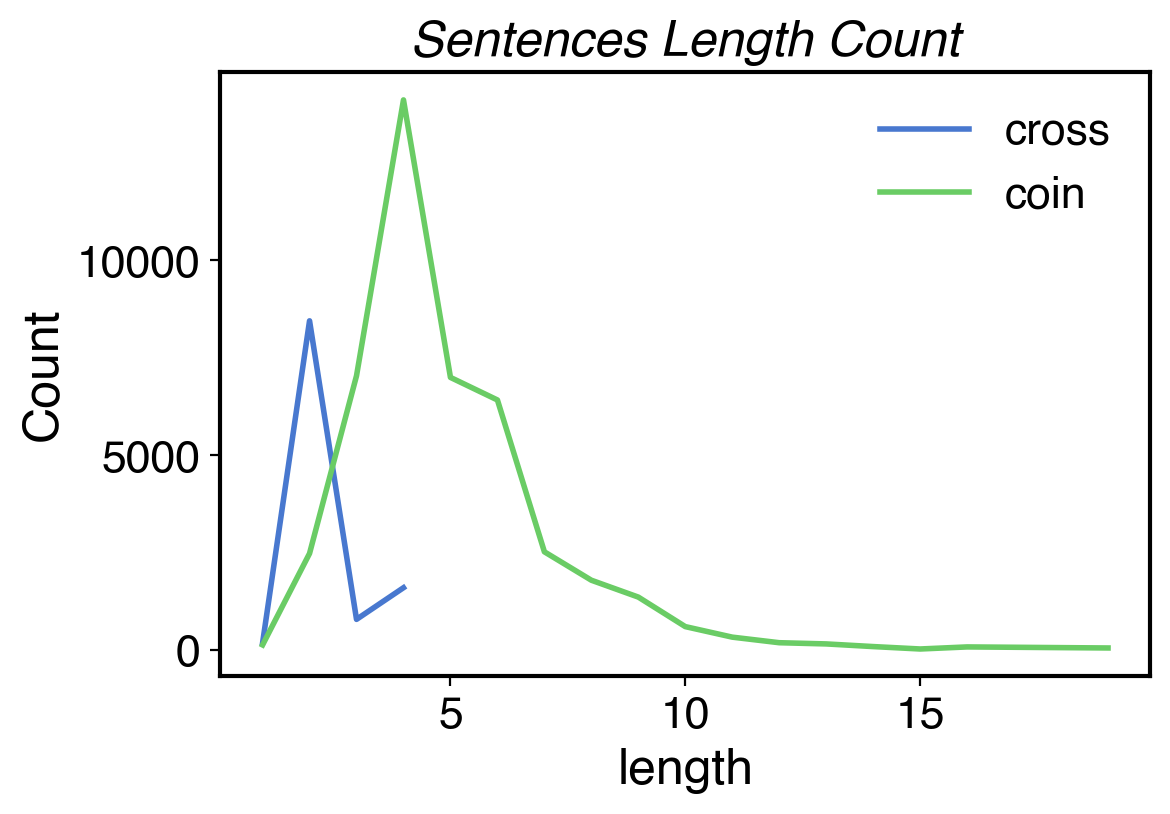

In [11]:
plt.figure()
for key, val in sentences_count.items():
    plt.plot(val.keys(), val.values(), label=key)
plt.title("Sentences Length Count", fontstyle="italic")
plt.xlabel("length")
plt.ylabel("Count")
plt.legend(loc='best', numpoints=1, fancybox=False)
plt.savefig("statistics-sentences.pdf", dpi=300)

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

(-0.5, 999.5, 499.5, -0.5)

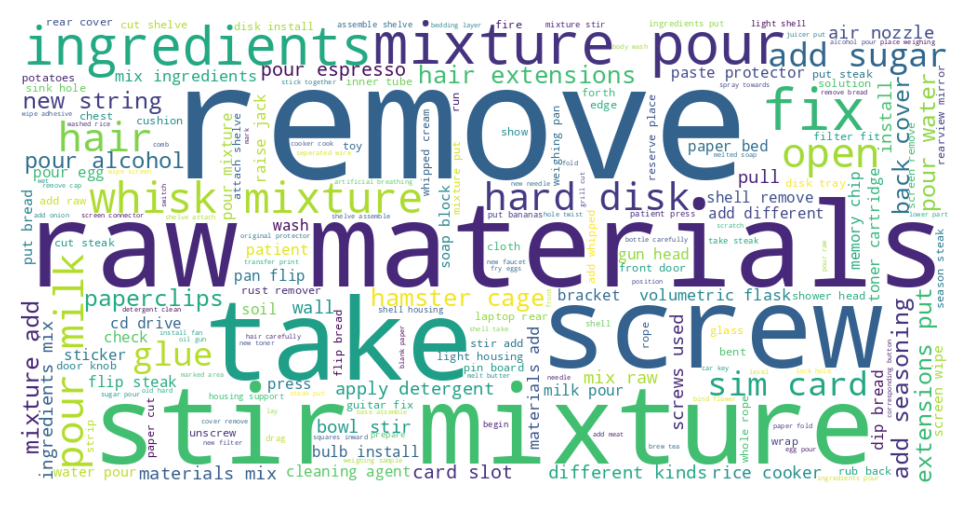

In [13]:
# join the list and lowercase all the words
text = ' '.join(words_all).lower()

#create the wordcloud object
wordcloud = WordCloud(width=1000,height=500,stopwords = STOPWORDS, collocations=True, background_color="white").generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

In [14]:
with jsonlines.open("/data/vtt/meta/vtt.jsonl") as reader:
    data = list(reader)
sentences = defaultdict(int)
for sample in data:
    for step in sample["annotation"]:
        n_word = len(step["label"].split())
        sentences[n_word] += 1

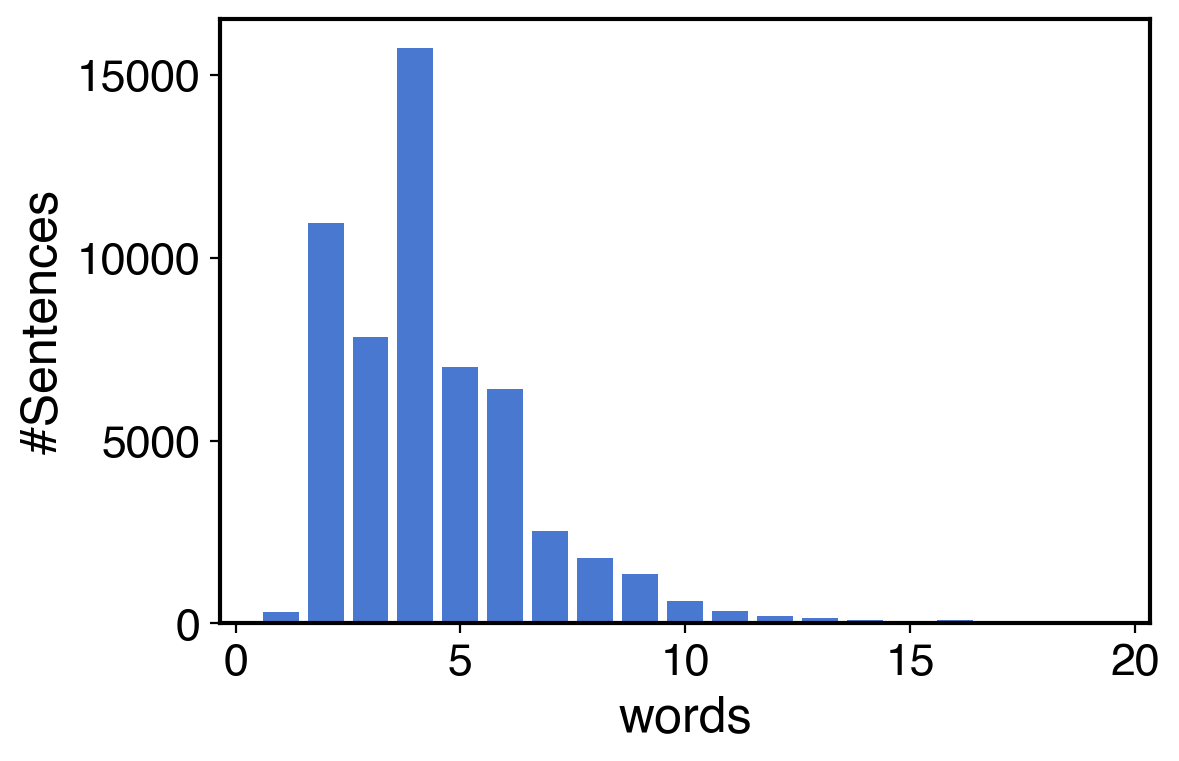

In [15]:
font_size = 16
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1.5

axis = plt.bar(sentences.keys(), sentences.values())
# plt.xticks(list(sentences.keys()))
plt.ylabel("#Sentences")
plt.xlabel("words")

plt.savefig("sentences_dist.pdf", dpi=300)

In [16]:
## merge two plots into one

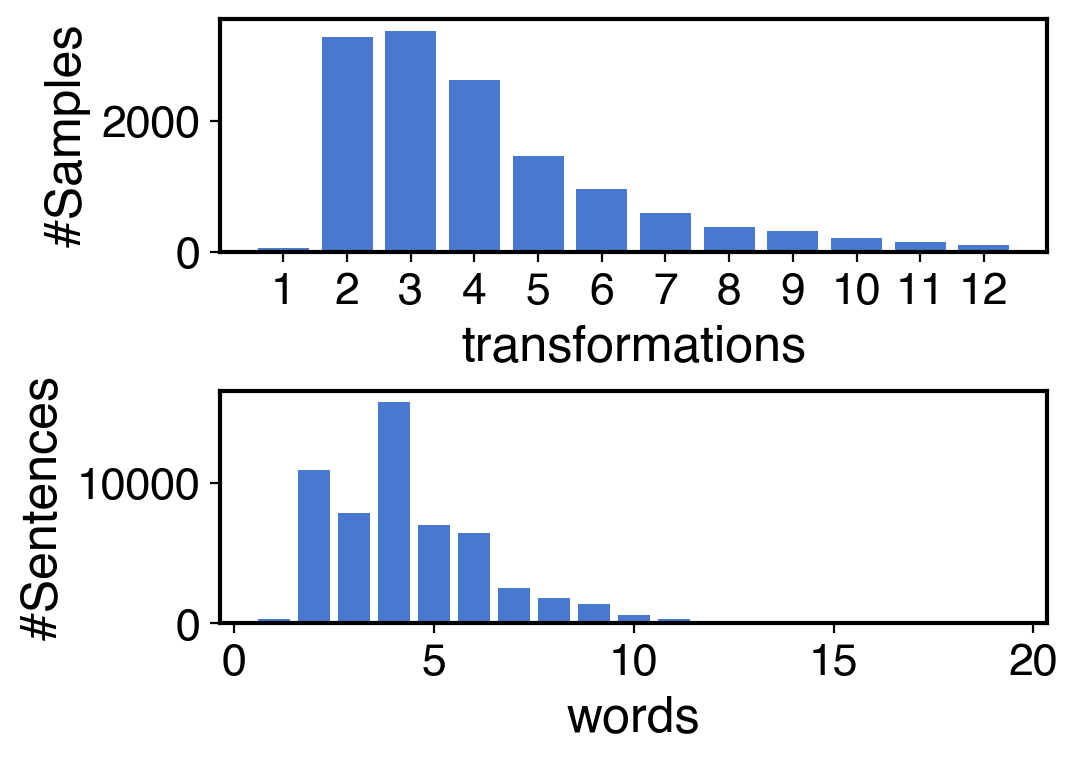

In [17]:
font_size = 16
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1.5

width, height = plt.figaspect(0.75)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(width, height))



ax1.bar(steps_count.keys(), steps_count.values())
ax1.set_xticks(list(steps_count.keys()))
ax1.set_xlabel("transformations")
ax1.set_ylabel("#Samples")

ax2.bar(sentences.keys(), sentences.values())
# plt.xticks(list(sentences.keys()))
ax2.set_ylabel("#Sentences")
ax2.set_xlabel("words")

# plt.subplots_adjust(hspace=0.25, wspace=0.40)
plt.subplots_adjust(hspace=0.6) 

plt.savefig("steps_sentences_dist.pdf", dpi=300)

## statistics of categories

In [18]:
with jsonlines.open("/data/vtt/meta/vtt.jsonl") as reader:
    data = list(reader)

In [19]:
import re
class ListData:
    def __init__(self, data_list):
        self._data_list = data_list
        self._id_map = {sample["id"]: sample for sample in data_list}

    def __getitem__(self, _id):
        return self._id_map[_id]

    def __len__(self):
        return len(self._data_list)

    def __iter__(self):
        return self._data_list.__iter__()


class Taxonomy:
    def __init__(self, json_path="/data/coin/data/taxonomy.json"):
        with open(json_path) as f:
            self._data = json.load(f)
        self.domains = ListData(self._data["domain"])
        self.targets = ListData(self._data["target"])
        self.actions = ListData(self._data["action"])

    def get_domain_targets(self, domain_id):
        domain = self.domains[domain_id]
        targets = [self.targets[_id] for _id in domain["target_list"]]
        return targets

    def get_target_actions(self, target_id):
        target = self.targets[target_id]
        actions = [self.actions[_id] for _id in target["action_list"]]
        return actions

    def get_action_target(self, action_id):
        return self.targets[self.actions[action_id]["target_id"]]

    def get_target_domain(self, target_id):
        return self.domains[self.targets[target_id]["domain_id"]]

    def get_action_domain(self, action_id):
        target = self.get_action_target(action_id)
        return self.domains[target["domain_id"]]
    def split_words(self, s):
        # split words by Capital letter
        words = re.findall(r"CPR|RJ45|SIM|SSD|CD|TV|PC|[A-Z][^A-Z]*", s)
        words = " ".join(words)
        return words

In [20]:
taxonomy = Taxonomy()

In [21]:
print(f"{len(taxonomy.domains)} domains")
print(f"{len(taxonomy.targets)} targets")
print(f"{len(taxonomy.actions)} actions")

12 domains
180 targets
778 actions


In [22]:
for i, domain in enumerate(taxonomy.domains):
    targets = taxonomy.get_domain_targets(domain['id'])
    # print(f"{i:02d}. {domain['label']}")
    print(f"{i:02d}. {domain['label']}")
    # for i, target in enumerate(targets):
    #     actions = taxonomy.get_target_actions(target['id'])
    #     print(f"\t{i:03d}. {target['label']}")
        # for i, action in enumerate(actions):
        #     print(f"\t\t{i:03d}. {action['label']}")

00. Nursing and Care
01. Vehicle
02. Leisure and Performance
03. Gadgets
04. Electrical Appliance
05. Furniture and Decoration
06. Science and Craft
07. Pets and Fruit
08. Drink and Snack
09. Dish
10. Sport
11. Housework


In [23]:
for i, domain in enumerate(taxonomy.domains):
    targets = taxonomy.get_domain_targets(domain['id'])
    print(f"{i:02d}. {domain['label']}")
    for i, target in enumerate(targets):
        actions = taxonomy.get_target_actions(target['id'])
        print(f"\t{i:03d}. {taxonomy.split_words(target['label'])}")
        # for i, action in enumerate(actions):
        #     print(f"\t\t{i:03d}. {action['label']}")

00. Nursing and Care
	000. Remove Blackheads With Glue
	001. Wash Hair
	002. Shave Beard
	003. Wear Contact Lenses
	004. Use Earplugs
	005. Put On Hair Extensions
	006. Wash Dog
	007. Perform CPR
	008. Give An Intramuscular Injection
	009. Bandage Dog Paw
	010. Draw Blood
	011. Bandage Head
	012. Use Epinephrine Auto-injector
	013. Use Neti Pot
01. Vehicle
	000. Park Parallel
	001. Change Bike Tires
	002. Change Bike Chain
	003. Change Car Tire
	004. Use Jack
	005. Polish Car
	006. Fuel Car
	007. Replace Car Fuse
	008. Replace Rearview Mirror Glass
	009. Tie Boat To Dock
	010. Replace A Wiper Head
	011. Remove Scratches From Windshield
	012. Pump Up Bicycle Tire
	013. Patch Bike Inner Tube
	014. Install License Plate Frame
	015. Replace Tyre Valve Stem
	016. Install Bicycle Rack
	017. Replace Car Window
02. Leisure and Performance
	000. Prepare Canvas
	001. Change Guitar Strings
	002. Replace Drumhead
	003. Do Lino Printing
	004. Prepare Sumi Ink
	005. Perform Paper To Money Trick
	006

In [24]:
import sys
sys.path.append("..")
import src.utils.datatool as dtool
tasks = dtool.read_jsonlines("/data/CrossTask/crosstask_release/tasks.jsonl")

In [25]:
for i, task in enumerate(tasks):
    print(f"\"{task['task']}\": \"\",")

"Make Jello Shots": "",
"Build Simple Floating Shelves": "",
"Make Taco Salad": "",
"Grill Steak": "",
"Make Kimchi Fried Rice": "",
"Make Meringue": "",
"Make a Latte": "",
"Make Bread and Butter Pickles": "",
"Make Lemonade": "",
"Make French Toast": "",
"Jack Up a Car": "",
"Make Kerala Fish Curry": "",
"Make Banana Ice Cream": "",
"Add Oil to Your Car": "",
"Change a Tire": "",
"Make Irish Coffee": "",
"Make French Strawberry Cake": "",
"Make Pancakes": "",
"Make a Black Forest Cake": "",
"Make Lavender Lemonade": "",
"Make Gummy Bears": "",
"Make Prawn Curry": "",
"Make Dutch Coffee": "",
"Make Papaya Salad": "",
"Cook Tuna Steak": "",
"Make Garlic Dill Pickles": "",
"Build a Desk": "",
"Make London Broil": "",
"Make Tiramisu Coffee": "",
"Make Vegan French Toast": "",
"Cook Italian Sausage": "",
"Build a Bookshelf": "",
"Cook Brazilian Rice": "",
"Make a Christmas Cake": "",
"Pickle Okra": "",
"Make Steak Teppanyaki": "",
"Make Masala Sauce": "",
"Grill Kabobs": "",
"Can Tomato S

In [26]:
for i, domain in enumerate(taxonomy.domains):
    targets = taxonomy.get_domain_targets(domain['id'])
    print(f"{i:02d}. {domain['label']}")
    # for i, target in enumerate(targets):
    #     actions = taxonomy.get_target_actions(target['id'])
    #     print(f"\t{i:03d}. {target['label']}")
        # for i, action in enumerate(actions):
        #     print(f"\t\t{i:03d}. {action['label']}")

00. Nursing and Care
01. Vehicle
02. Leisure and Performance
03. Gadgets
04. Electrical Appliance
05. Furniture and Decoration
06. Science and Craft
07. Pets and Fruit
08. Drink and Snack
09. Dish
10. Sport
11. Housework


### Plot category distribution

In [27]:
with jsonlines.open("/data/vtt/meta/vtt.jsonl") as reader:
    data = list(reader)

In [28]:
from collections import defaultdict

topics = defaultdict(int)
categories = defaultdict(int)
topics_split = defaultdict(lambda: defaultdict(int))
for sample in data:
    topics[sample['topic']] += 1
    categories[sample['category']] += 1
    topics_split[sample['split']][sample['topic']] += 1

In [29]:
categories

defaultdict(int,
            {'Vehicle': 1418,
             'Dish': 1813,
             'Science and Craft': 971,
             'Electrical Appliance': 1465,
             'Drink and Snack': 1656,
             'Nursing and Care': 872,
             'Gadgets': 1391,
             'Sport': 456,
             'Leisure and Performance': 1092,
             'Furniture and Decoration': 1025,
             'Pets and Fruit': 525,
             'Housework': 863})

Text(0, 0.5, '#Samples')

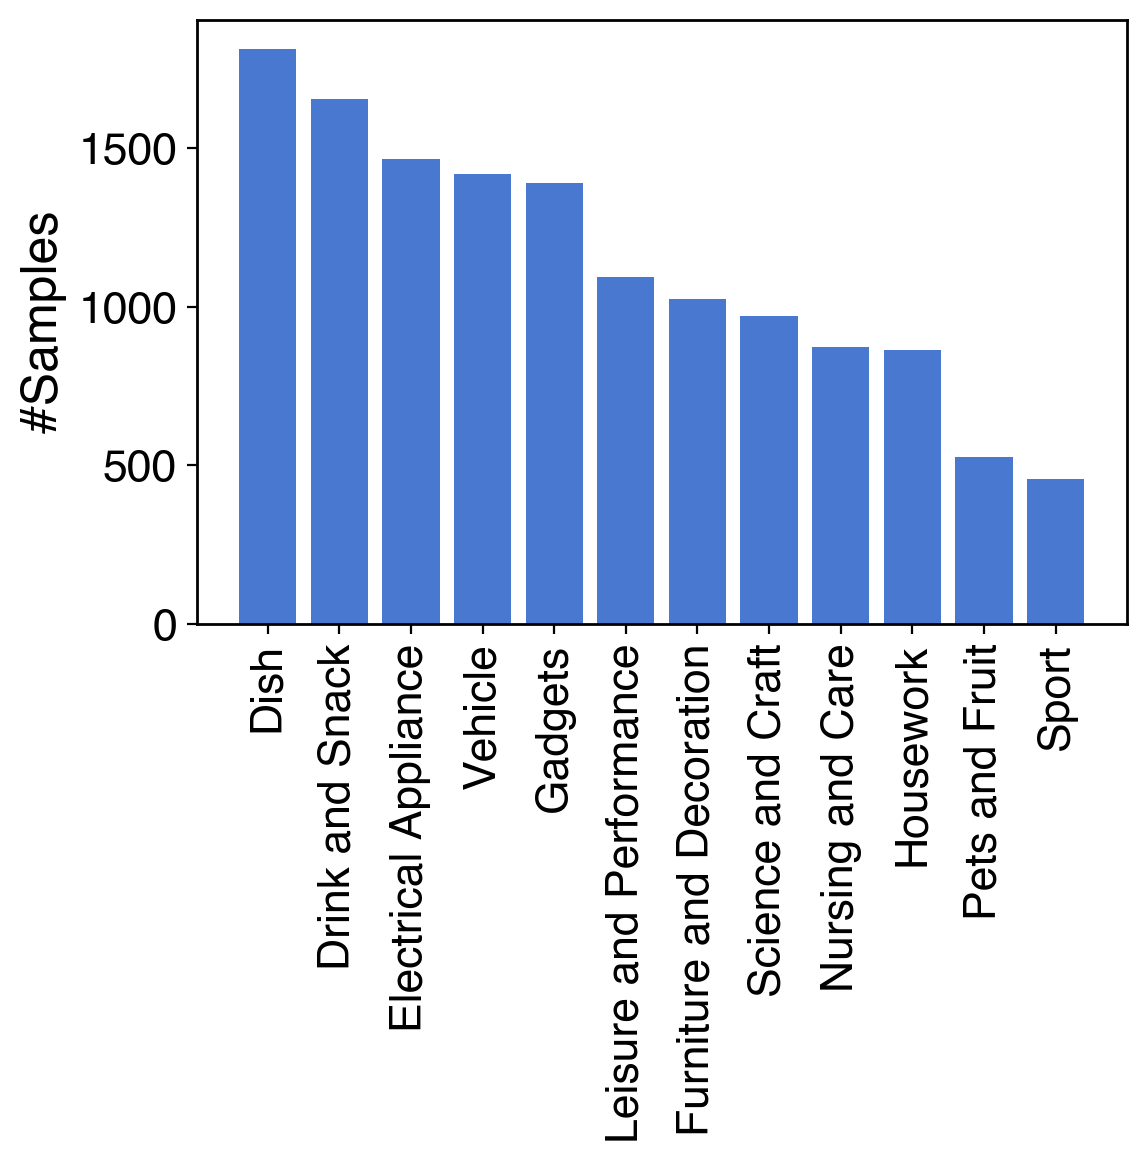

In [30]:
list_sorted = sorted(categories.items(), key=lambda x: x[1], reverse=True)

font_size = 16
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1

plt.xticks(rotation='vertical')
axis = plt.bar([x[0] for x in list_sorted], [x[1] for x in list_sorted])
plt.ylabel("#Samples")

In [31]:
print(plt.colormaps())
colors = plt.get_cmap("Set3")

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

tab20c


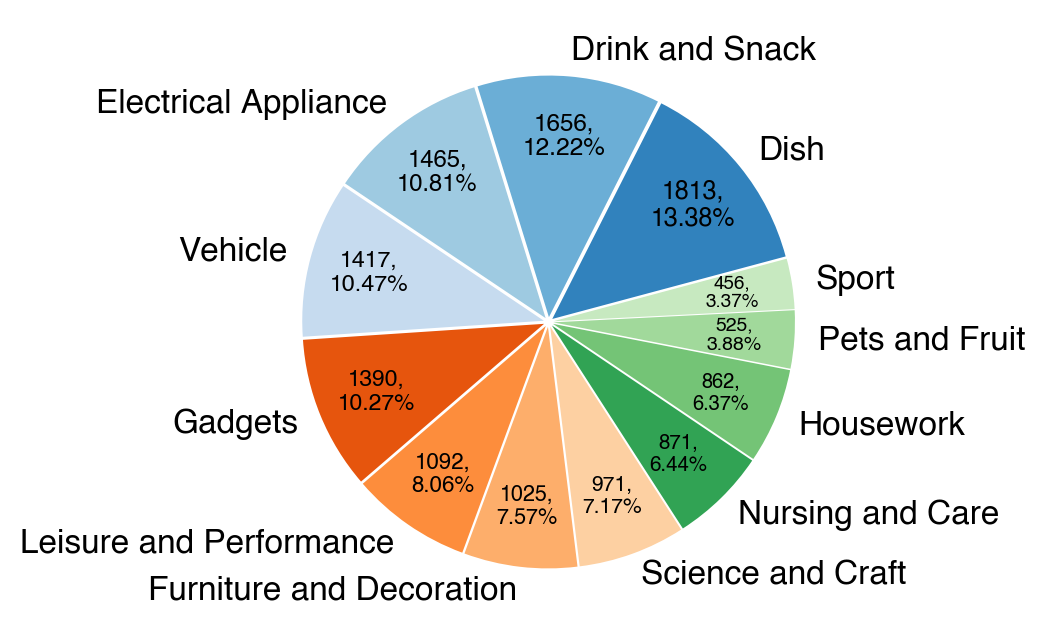

In [32]:
import random
list_sorted = sorted(categories.items(), key=lambda x: x[1], reverse=True)
n_sample = sum([x[1] for x in list_sorted])

width, height = plt.figaspect(1)
plt.figure(figsize=(width,height))

font_size = 12

colormap = random.choice(['Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])
colormap = "tab20c"
print(colormap)

plt.style.use('seaborn-muted')
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['font.size'] = font_size
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1

_, _, autotexts = plt.pie(
    [x[1] / n_sample for x in list_sorted],
    # labels = [f"{x[0]} \n{x[1]}" for x in list_sorted],
    labels = [f"{x[0]}" for x in list_sorted],
    startangle=15,
    explode=[0.02] * len(list_sorted),
    autopct=lambda x: f"{int(x*n_sample/100)},\n{x:.2f}%",
    pctdistance=0.75,
    colors=plt.get_cmap(colormap).colors
)
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(font_size - 3 - i*0.2)
plt.savefig("categories_dist.pdf", dpi=300)

In [33]:
len(topics)

198

tab20b


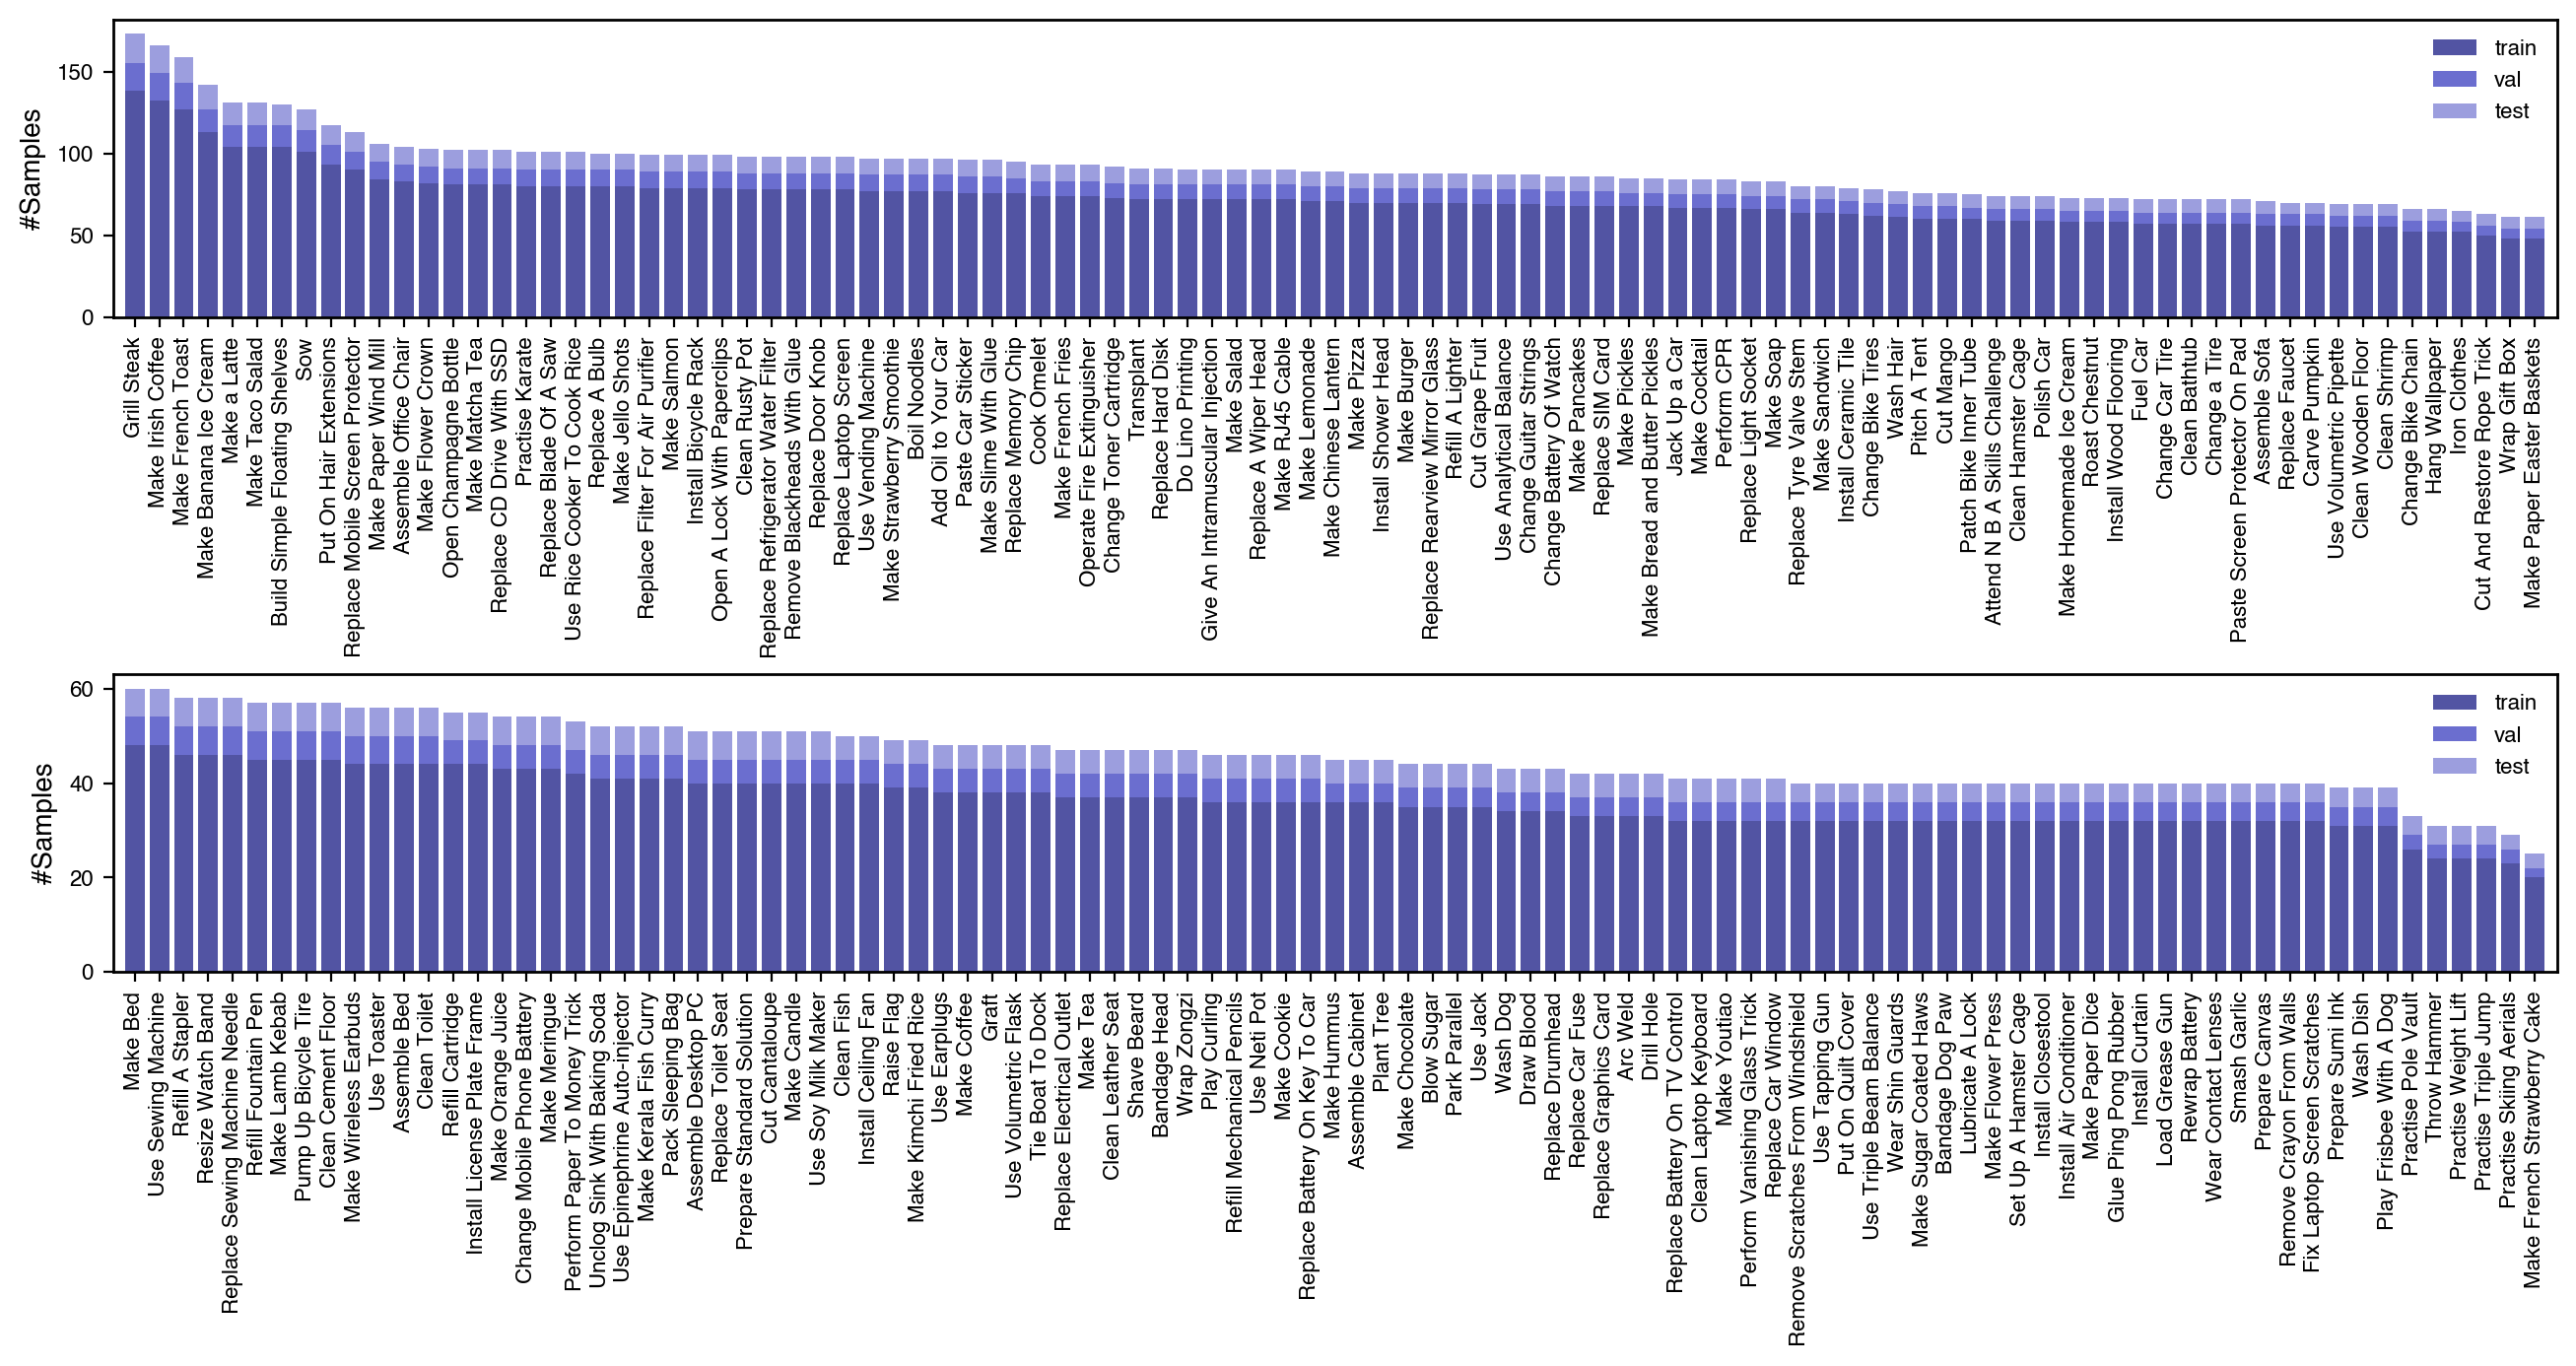

In [41]:
sorted_keys = sorted(topics.items(), key=lambda x: x[1], reverse=True)
list_sorted = {}
list_sorted['train'] = [(x[0], topics_split['train'][x[0]]) for x in sorted_keys]
list_sorted['val'] = [(x[0], topics_split['val'][x[0]]) for x in sorted_keys]
list_sorted['test'] = [(x[0], topics_split['test'][x[0]]) for x in sorted_keys]

n_rows = 2

width, height = plt.figaspect(0.2)
fig, ax = plt.subplots(n_rows, 1, figsize=(width, height*n_rows))

split_pos = len(list_sorted['train']) // n_rows

font_size = 8
plt.rcParams["figure.dpi"] = 200
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['axes.labelsize'] = font_size + 2
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['axes.linewidth'] = 1

colormap = random.choice(['Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])
colormap = "tab20b"
colors = plt.get_cmap(colormap).colors
print(colormap)

for i, axi in enumerate(ax):

    start = i * split_pos
    end = len(list_sorted['train']) if i == (len(ax) - 1) else (i + 1) * split_pos
    last_top = [0] * (end - start)
    for j, split in enumerate(["train", "val", "test"]):
        items = list_sorted[split]
        key = [x[0] for x in list_sorted[split][start:end]]
        val = [x[1] for x in list_sorted[split][start:end]]
        axi.bar(
            key,
            val,
            bottom=last_top,
            label=split,
            color=colors[j+1]
        )
        for i in range(len(last_top)):
            last_top[i] += val[i]
    axi.margins(x=0.005)
    axi.tick_params(axis='x', rotation=90)
    axi.set_ylabel("#Samples")

    axi.legend()
plt.subplots_adjust(hspace=1.2)
plt.savefig("topics_dist.pdf", dpi=300)

## Statistics Table

In [48]:
with jsonlines.open("/data/vtt/meta/vtt.jsonl") as reader:
    data = list(reader)
statistics = defaultdict(lambda: defaultdict(int))
for sample in data:
    for key in ["total", sample["split"]]:
        statistics[key]["Samples"] += 1
        statistics[key]["Segments"] += len(sample["annotation"])
        statistics[key]["Duration"] += sample["duration"]
        # statistics[key]["seg_duration"] += sum([
        #     x['segment'][1] - x['segment'][0] 
        #     for x in sample['annotation']
        # ])

In [49]:
statistics

defaultdict(<function __main__.<lambda>()>,
            {'total': defaultdict(int,
                         {'Samples': 13547,
                          'Segments': 55482,
                          'Duration': 2143322.672681995}),
             'train': defaultdict(int,
                         {'Samples': 10759,
                          'Segments': 43957,
                          'Duration': 1700592.102603003}),
             'test': defaultdict(int,
                         {'Samples': 1436,
                          'Segments': 5903,
                          'Duration': 227585.34979500013}),
             'val': defaultdict(int,
                         {'Samples': 1352,
                          'Segments': 5622,
                          'Duration': 215145.22028400024})})

In [50]:
import pandas as pd
df = pd.DataFrame.from_dict(statistics, orient="index")
df

,Samples,Segments,Duration
total,13547,55482,2.143323e+06
train,10759,43957,1.700592e+06
test,1436,5903,2.275853e+05
val,1352,5622,2.151452e+05


In [51]:
print(f"increase {(13547 - 11827)/11827*100:.2f}% samples")
print(f"increase {(595 - 476 + (22 - 38)/60)/(476+38/60)*100:.2f}% duration")
print(f"increase {(55482 - 46354)/46354*100:.2f}% segments")

increase 14.54% samples
increase 24.91% duration
increase 19.69% segments


In [53]:
import sys
sys.path.append("..")
from src.utils.timetool import time2str
from functools import partial
time_fmt = partial(time2str, units=["h", "min"])
df["Duration"] = df["Duration"].apply(time_fmt)
df

,Samples,Segments,Duration
total,13547,55482,595h 22min
train,10759,43957,472h 23min
test,1436,5903,63h 13min
val,1352,5622,59h 45min


In [54]:
print(
    df.style.to_latex(
        caption="Statistics of the VTT dataset",
        hrules=True,
        position="ht",
        position_float="centering",
    )
)

\begin{table}[ht]
\centering
\caption{Statistics of the VTT dataset}
\begin{tabular}{lrrl}
\toprule
 & Samples & Segments & Duration \\
\midrule
total & 13547 & 55482 & 595h 22min \\
train & 10759 & 43957 & 472h 23min \\
test & 1436 & 5903 & 63h 13min \\
val & 1352 & 5622 & 59h 45min \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
x